In [61]:
import pandas as pd 
import numpy as np
import itertools
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from scipy.stats import norm, t
import openpyxl


1. Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал
таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n
таксистов Самарканда всегда на работе и приезжают равновероятно.

а) Постройте график функции правдоподобия как функции от общего количества такси
n. Найдите оценку числа n методом максимального правдоподобия.

Вероятность встретить нового такстиста в первый день - $P_1 = 1$

Вероятность встретить нового такстиста во второй день - $P_2 = 1 * \frac{n-1}{n}$

Вероятноть встретить нового таксиста в k день - $P_k = 1*\frac{n-1}{n}*\frac{n-2}{n}*\frac{n-3}{n}...*\frac{n-k}{n}$

Вероятность встретить таксиста который уже приезжал на $x$ заказе $P_s = 1*\frac{n-1}{n}*\frac{n-2}{n}*\frac{n-3}{n}...*\frac{n-8}{n}*\frac{9}{n}$

Запишем функцию максимального правдободобия:

In [13]:
def L(n, d=10):
    res = 1
    for i in range(d - 1):
        res *= (n - i) / n
    res *= (d - 1) / n
    return res

Построим график значения функции максимального правдободобия в зависимости от количества таксистов

MLE оценка: 10


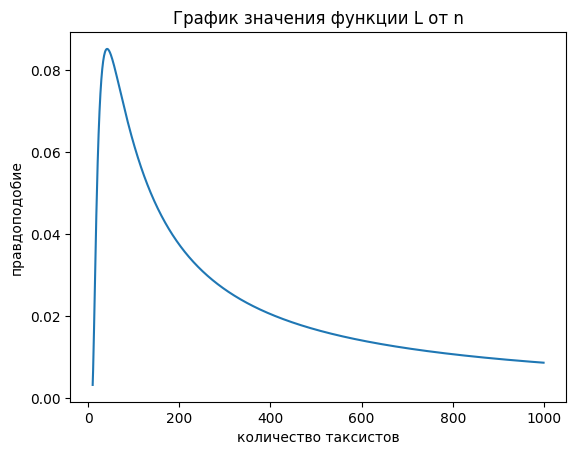

In [19]:
l_fora = []
for i in range(10, 1000):
    l_fora.append(L(i, 10))
    
plt.plot(range(10, 1000), l_fora);
plt.title('График значения функции L от n')
plt.xlabel('количество таксистов')
plt.ylabel('правдоподобие')

print('MLE оценка:', range(9, 100)[np.argmax(np.vectorize(L(n, 10)))] + 1)

Добавили единицу, так как счет идет с нуля

In [ ]:
б) Постройте график математического ожидания номера заказа, на котором происходит
первый повторный приезд, как функции от общего количества такси n. Найдите оценку
числа n методом моментов

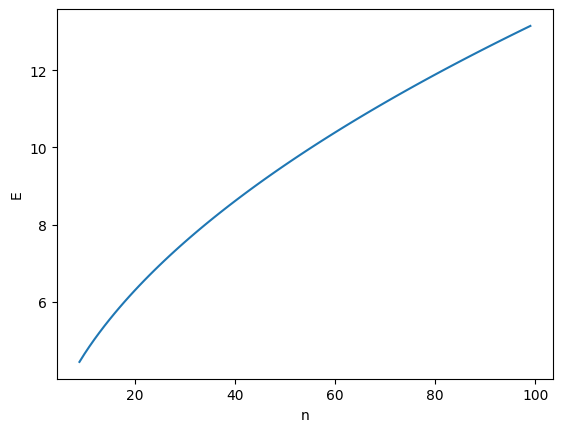

55

In [23]:

def moon(a, b, c=False):
    for n in a:
        ev = 0
        for i in range(2, n+1):
            t = 1
            for k in range(i - 1):
                t *= (n - k) / n
            t *= (i - 1) / n
            ev += i * t
        b.append(ev*(c==0) + abs(10 - ev)*c)


e = []
lst = range(9, 100)
moon(lst, e)
    
plt.plot(lst, e)
plt.xlabel('n')
plt.ylabel('E')
plt.show()
diff = []
moon(lst, diff, True)
lst[np.argmin(diff)]

2. Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе он обнаружил, что у
таксистов было 6 разных имён. Для упрощения предположим, что все n имён среди таксистов
встречаются равновероятно и независимо от поездки к поездке.

а) Постройте график функции правдоподобия как функции от общего количества имён
n. Найдите оценку числа n методом максимального правдоподобия

In [32]:
def L_2(n, q, k):
  
    ans=1
    for i in range(1, q):
        ans *= ((n-i)/n)
    es = itertools.combinations_with_replacement(np.arange(1, q+1), k - q)
    c = 0
    for e in es:
        t = 1
        for i in range(k - q):
            t *= e[i]
        c += t
    ans *= (c/(n**(k - q)))
    return ans

Нарисуем график Зависимость величины функции правдоподобия от n от величины самой функции

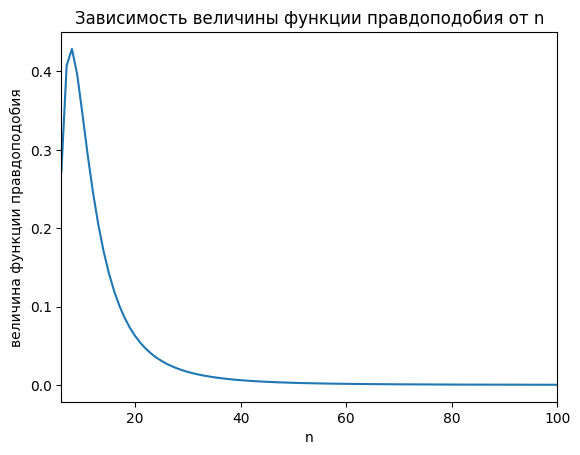

('mle:', 8)

In [34]:
l_forb = []
for i in range(6, 500):
    l_forb.append(L_2(i,6, 10))

plt.plot(range(6, 500), l_forb)
plt.xlabel('n')
plt.ylabel('величина функции правдоподобия')
plt.title('Зависимость величины функции правдоподобия от n')
plt.xlim(6, 100)
plt.show()

'mle:', range(6, 500)[np.argmax(l_forb)]

б) Постройте график математического ожидания числа разных имён у 10 таксистов, как
функции от общего количества имён n. Найдите оценку числа n методом моментов.

In [45]:
L_2 = []
for n in range(1, 500):
    l_2 = 0
    for i in range(1, min(n+1, 11)):
        t = 1
        for k in range(0, i):
            t *= (n - k)/n
        t *= c_list[i-1]/n**(10-i)
        l_2 += i*t
    L_2.append(l_2)


NameError: name 'c_list' is not defined

Нарисуем график зависимости величины зависимости матожидания от n от величины матожидания

In [ ]:
plt.plot(np.arange(1, 500), L_2)
plt.xlabel('n')
plt.ylabel('Матожидание')
plt.title('Зависимость матожидания от n')
plt.show()

Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для математического ожидания несколькими способами: классический асимптотический нормальный
интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.


а) Для каждого способа с помощью 10000 симуляций оцените вероятность того, что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание,
если наблюдения распределены экспоненциально с интенсивностью 1.

In [53]:
def generate_sample(n):
    return np.random.exponential(scale=1, size=n)

def classic_interval(sample):
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    z = norm.ppf(0.975)
    left = mean - z * std / np.sqrt(n)
    right = mean + z * std / np.sqrt(n)
    return left, right

def naive_bootstrap_interval(sample):
    n = len(sample)
    bootstrap_means = []
    for i in range(10000):
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    left = np.percentile(bootstrap_means, 2.5)
    right = np.percentile(bootstrap_means, 97.5)
    return left, right

def t_bootstrap_interval(sample):
    n = len(sample)
    bootstrap_means = []
    for i in range(10000):
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_std = np.std(bootstrap_sample, ddof=1)
        t_stat = (bootstrap_mean - np.mean(sample)) / (bootstrap_std / np.sqrt(n))
        bootstrap_means.append(t_stat)
    left = np.percentile(bootstrap_means, 2.5)
    right = np.percentile(bootstrap_means, 97.5)
    left = np.mean(sample) - left * np.std(sample, ddof=1) / np.sqrt(n)
    right = np.mean(sample) - right * np.std(sample, ddof=1) / np.sqrt(n)
    return left, right


def estimate_coverage_probability(interval_func):
    n = 20
    true_mean = 1
    coverage_count = 0
    for i in range(10000):
        sample = generate_sample(n)
        interval = interval_func(sample)
        if interval[0] <= true_mean <= interval[1]:
            coverage_count += 1
    return coverage_count / 10000

r1, r2, r3 = 0, 0, 0


print("Классический нормальный:", estimate_coverage_probability(classic_interval))
print("Наивный бутстрап:", estimate_coverage_probability(naive_bootstrap_interval))
print("Т-бутстрап", estimate_coverage_probability(t_bootstrap_interval))


Классический нормальный: 0.9028


б) Пересчитайте вероятности накрытия, если наблюдения имеют распределение Стьюдента с тремя степенями свободы.

In [56]:
def generate_sample1(n):
    return np.random.standard_t(df=3, size=n)

def classic_interval(sample):
    n = len(sample)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    z = norm.ppf(0.975)
    left = mean - z * std / np.sqrt(n)
    right = mean + z * std / np.sqrt(n)
    return left, right

def naive_bootstrap_interval(sample):
    n = len(sample)
    bootstrap_means = []
    for i in range(10000):
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    left = np.percentile(bootstrap_means, 2.5)
    right = np.percentile(bootstrap_means, 97.5)
    return left, right

def t_bootstrap_interval(sample):
    n = len(sample)
    bootstrap_means = []
    for i in range(10000):
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_std = np.std(bootstrap_sample, ddof=1)
        t_stat = (bootstrap_mean - np.mean(sample)) / (bootstrap_std / np.sqrt(n))
        bootstrap_means.append(t_stat)
    left = np.percentile(bootstrap_means, 2.5)
    right = np.percentile(bootstrap_means, 97.5)
    left = np.mean(sample) - left * np.std(sample, ddof=1) / np.sqrt(n)
    right = np.mean(sample) - right * np.std(sample, ddof=1) / np.sqrt(n)
    return left, right


def estimate_coverage_probability(interval_func):
    n = 20
    true_mean = 1
    coverage_count = 0
    for i in range(10000):
        sample = generate_sample1(n)
        interval = interval_func(sample)
        if interval[0] <= true_mean <= interval[1]:
            coverage_count += 1
    return coverage_count / 10000

r1, r2, r3 = 0, 0, 0


print("Классический нормальный:", estimate_coverage_probability(classic_interval))
print("Т-бутстрап", estimate_coverage_probability(t_bootstrap_interval))
print("Наивный бутстрап:", estimate_coverage_probability(naive_bootstrap_interval))

Классический нормальный: 0.1914


в) Какой способ оказался лучше?

Нельзя однозначно сказать, какой код лучше. Каждый способ показал лучше результат в одном или и том интервале. Экспоненциального распределение: бутстрап т-статистики показал лучший результат. Распределения Стьюдента - классический интервал

4. Проверьте гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у
кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернативной гипотезы возьмите гипотезу о неравенстве.

а) Используйте тест Уэлча

In [68]:
df = pd.read_excel('22-23_hse_probability.xlsx', sheet_name='Exam')
df.drop (index=[0,1,2,3,4], axis= 0 , inplace= True )
new_df = df[["Last name", "Unnamed: 72"]]

In [71]:
x_list = ['У', 'Е','Ы','А','О','Э','Я','И','Ю','Ё']
x, y = [], []

for el in new_df.index:
    if new_df.loc[el]['Last name'][0] in x_list:
        x.append([new_df.loc[el]['Last name'], new_df.loc[el]['Unnamed: 72']])
    else:
        y.append([new_df.loc[el]['Last name'], new_df.loc[el]['Unnamed: 72']])

a = [i[-1] for i in x]
b = [i[-1] for i in y]

a = np.array(a)
b = np.array(b)
sts.ttest_ind(a, b)

Ttest_indResult(statistic=-0.8791005932448916, pvalue=0.3799864037939753)

Получаем pvalue = 0,37 Значит на уровне значимости а = 0,05 гипотеза о равенстве не отвергается.

б) Используйте наивный бутстрэп.


In [76]:
L_x = np.random.choice(a, size=(10000, len(a)))
L_y = np.random.choice(b, size=(10000, len(b)))
cp_x = sample_x.mean(axis=1)
cp_y = sample_y.mean(axis=1)
dif = mean_x - mean_y

print('Левый интервал', np.percentile(dif, q=2.5))
print('Правый интервал', np.percentile(dif, q=97.5))
print('Значение в интервале -> H0 не отвергаем')

Левый интервал -3.5608494988101254
Правый интервал 1.365500829306987
Значение в интервале -> H0 не отвергаем


в) Используйте бутстрэп t-статистики.

In [92]:
znach = (a.mean() - b.mean())/(np.sqrt(a.var(ddof=1)/len(a) + b.var(ddof=1)/len(b)))
print('znach:', znach)
a_b = np.random.choice(a, (10000, len(a)))
b_b = np.random.choice(b, (10000, len(b)))
t_st = ((a_b.mean(axis=1)  - b_b.mean(axis=1))-(a.mean()-b.mean()))/(np.sqrt(a_b.var(axis=1, ddof=1)/len(a)+b_b.var(axis=1, ddof=1)/len(b)))
print('Левый интервал', np.percentile(t_st, q=2.5))
print('Правый интервал', np.percentile(t_st, q=97.5))
print('Значение в интервале -> H0 не отвергаем')

znach: -0.8519661870595602
Левый интервал -1.96839271970402
Правый интервал 2.1067543546779866
Значение в интервале -> H0 не отвергаем


г) Используйте перестановочный тест

In [91]:
C = np.concatenate([a, b])
difs = []
znach = a.mean() - b.mean()
print('znach:', znach)
for i in range(10000):
    c = np.random.permutation(C)
    difs.append(c[:50].mean() - c[50:].mean())
    
np.percentile(difs, q=2.5), np.percentile(difs, q=97.5), 'dif_th in interval -> H0 не отвергаем'
print('Левый интервал', np.percentile(difs, q=2.5))
print('Правый интервал', np.percentile(difs, q=97.5))
print('Значение в интервале -> H0 не отвергаем')

znach: -1.0782433114588574
Левый интервал -2.4073758865248216
Правый интервал 2.3253900709219852
Значение в интервале -> H0 не отвергаем


7. С помощью chatgpt решите любую задачу из нашего курса теории вероятностей и статистики. Можно брать задачи из прошлых контрольных, лекций, семинаров и даже этого домашнего
задания. В качестве ответа приведите полный диалог с chatgpt.

![title](Screenshot_1.png)
![title](Screenshot_2.png)

8. Укажите любой источник по теории вероятностей или статистике, который вам оказался
полезен в течение года. Это может быть статья, видео, задача, всё что угодно. Объясните, с чем
конкретно этот источник помог разобраться. Лучше привести в пример внешний источник, не
упомянутый на вики курса, но можно и внутренний

Есть очень интересный канал от матфака вышки Mathematics at HSE. На нем представлены множество видео на все разделы математики в том числе на тему мат статистики и теории вероятности. Много видео с дополнительным материалом на разные темы, которые просто интересно смотреть в метро

https://www.youtube.com/@mathematicsathse1021/playlists